# Métodología para el problema de la flecha en el cojinete.


### 1. Identifique las variables 

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias 

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación 

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas. 

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces 

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

# Ejercicio

Una flecha será ensamblada en un cojinete. Si $X_1$ sigue una distribución Normal con media 1.5 y varianza de 0.0016, ademas $x_2$ sigue la misma distribución pero con media 1.48 y varianza 0.0009.

**a)** Calcule la probabilidad que haya interferencia. 

**b)** Calcule el Número de veces que es necesario realizar la simulación del experimento si quiere que la probabilidad simulada no difiera de su valor real en menos de 0.01 con un nivel de confianza del 95%.
1. Analíticamente.
2. Mediante simulación.

# **Analiticamente**
a) Por teoria sabemos que la suma de dos variables aleatorias normales se distribuyen de manera normal, y lo mismo aplica para restas, es decir si $X_1 \sim N(\mu_1,\sigma_1)$ el diametro del cojinete, y $X_2 \sim  (\mu_2, \sigma_2)$ entonces $X=X_1-X_2 \sim N\left(\mu_1-\mu_2, \sqrt{\sigma_1^2+\sigma_2^2}\right) $ si y solo si $X_1$ y $X_2$ son independientes.

Sea $X_1 \sim N(1.5,0.04)$ el diametro del cojinete, y $X_2 \sim  (1.48, 0.03)$ el diametro de la flecha.

Definamos $X=X_1-X_2$, la variable aleatoria que explica que el diametro del cojinete sea mayor que el diametro diametro de la flecha, $X \sim N\left(\mu_1-\mu_2, \sqrt{\sigma_1^2+\sigma_1^2}\right)$, entonces , $X \sim N\left(0.02, 0.05\right)$, así del problema buscamos que
\begin{gather*}
P(X<0)
\end{gather*}

Ahora calculamos el valor $Z=\frac{x-\mu}{\sigma}$,entonces con nuestro valores $Z=\frac{-0.02}{0.05}=-0.04$, y con las tablas de probabilidad para distribución normal obtenemos que $P(Z<-0.04)=0.3446$, o lo que es equivalente $P(X<0)=0.3445$, que corresponde a la probabilidad de que haya interferencia.


b) Del intervalo de confianza tenemos la siguiente condición, $\mu \leq \overline{x}+ \frac{Z_{\alpha/2}\sigma}{\sqrt{N}}$ y buscamos determinar $\mu - \overline{x} \leq 0.01$ con una confianza al 95%, lo cual implica que:

\begin{align*}
 \frac{Z_{\alpha/2}\sigma}{\sqrt{N}}&=0.01\\
  \frac{Z_{\alpha/2}\sigma}{0.01}&=\sqrt{N}\\
    \frac{1.96\sigma}{0.01}&=\sqrt{N}\\
    196\sigma&=\sqrt{N}\\
    N&=(1.96)^2\sigma^2\\
    N&= 38416*Varianza(\hat{p})
\end{align*}
Recordando que la Varianza del estimador de la probabilidad puede verse como:
\begin{align*}
Varianza\left(\frac{N_H}{N}\right) &= \frac{1}{N^2}N*p(1-p)\\
&= \frac{1}{N}p(1-p) \quad \quad \text{Sabiendo que p(probabilidad teorica) = 0.3445}\\
&= \frac{1}{N}(0.3445)(1-0.3445)
\end{align*}
Sustituyendo:
\begin{align*}
    N&= 38416*\frac{1}{N}(0.3445)(1-0.3445)\\
    N^2&=38416(0.3445)(1-0.3445)\\
    \therefore N &= \sqrt{38416(0.3445)(1-0.3445)} \approx 94 \quad\blacksquare
\end{align*}

# **Por simulación: Construimos el modelo en varios pasos.**

**PASO 1**. Defina las variables que intervienen en el modelo.

Definimos $x_1 \sim N(1.5, \sqrt{0.0016})$ y $x_2 \sim N(1.48, \sqrt{0.0009})$ como varibles aleatorias que nos sirven generar muestras aleatorias de una distribución Normal.

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$
f(x_1)= \frac{1}{0.4\sqrt{2\pi}}e^{\frac{(x_1-1.5)^2}{2*0.0016}}
$$

$$
f(x_2)= \frac{1}{0.3\sqrt{2\pi}}e^{\frac{(x_2-1.48)^2}{2*0.0009}}
$$

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(x_1)= \frac{1}{2} \left[ 1+\text{erf}\left( \frac{x_1-1.5}{0.04\sqrt{2}}\right)\right]
$$

$$
F(x_2)= \frac{1}{2} \left[ 1+\text{erf}\left( \frac{x_2-1.48}{0.03\sqrt{2}}\right)\right]
$$

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|    Variables |**x1**|**x2**|
|------|-------|----------|
|Intervalo|     ($-\infty$,$\infty$)   |  ($-\infty$,$\infty$)  |



**PASO 5**. Genere números aleatorios.

In [121]:
import numpy as np
import random
x1 = norm.ppf(random.random())*math.sqrt(0.0016)+1.5
x2 = norm.ppf(random.random())*math.sqrt(0.0009)+1.48

**PASO 6**. Simule un lanzamiento.

Si $x_1$ - $x_2$<0

¿Si ocurre lo de arriba? => **Acierto = 1**




Si $x_1$ - $x_2\geq$0

¿Si ocurre lo de arriba? => **Acierto =0**

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para 
garantizar la convergencia del resultado.

In [122]:
import numpy as np
import random
from scipy.stats import norm
import math
import matplotlib.pyplot as plt

# **Nota**

In [123]:
def experimentos(n): #Definimos una función que realizara 
  acierto = 0 #Contador que ira sumando las veces que caiga acierto en N cantidad de veces.
  proba=[] #Guardara las probabilidades de que haya interferencia entre el cojinete y la flecha en la iteración i.
  ensayos=[]
  for i in range(1,n+1):
      #x1 = (random.gauss(0, 1))*math.sqrt(0.0016) + 1.5
      #x2 = (random.gauss(0, 1))*math.sqrt(0.0009) + 1.48 
      x1 = norm.ppf(random.random())*math.sqrt(0.0016)+1.5
      x2 = norm.ppf(random.random())*math.sqrt(0.0009)+1.48
      if x1-x2 < 0:
          acierto = acierto + 1
      ensayos.append(i) #Se va guardando en una lista la iteración i.
      proba.append(acierto/i) #Se va guardadndo la probabilidad de que haya interferencia entre el cojinete y la flecha en la iteración i
  return area #Regresamos una lista de las probabilidades de que haya interferencia entre el cojinete y la flecha en la iteración i

In [124]:
exp = experimentos(1500) #Hara el experimento antes descrito 1500 veces, es decir, nos dara 
#1500 aproximaciones s la probabilidad para ver cuando se logra estabilizar.

In [125]:
np.mean(exp) #Saca la media de los experimentos, eso nos dará una idea de la aproximación al valor de la probabilidad.

0.34571843010039127

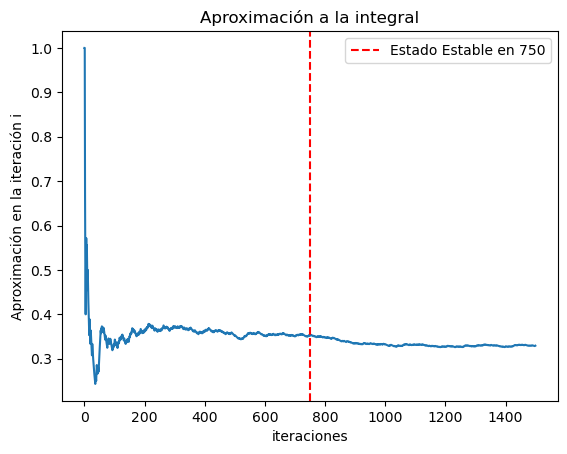

In [126]:
plt.plot(exp) #Grafica la lista de aproximaciones de acuerdo a la cantidad de experimentos realizados.
plt.xlabel('iteraciones')
plt.ylabel('Aproximación en la iteración i')
plt.title('Aproximación a la probabilidad')

# Agrega una línea vertical en la iteración 750 que de manera visual es donde comienza el estado estable.
plt.axvline(x=750, color='red', linestyle='--', label='Estado Estable en 750')

plt.legend()  # Muestra la leyenda si es necesario
plt.show()


**PASO 8**. Replique el modelo.

In [127]:
def valor(repeticiones): #Esta función hara la simulación anterior muchas veces, es decir, hará "repeticiones" cantidad de veces
    Proba = []
    for i in range(repeticiones):
        Area.append(np.mean(experimentos(750))) #Calcula la media de 750 experiementos unas N (repeticiones) cantidad de veces.
    return Proba #Nos regresa N (repeticiones) medias de 750 experimentos cada una.

In [128]:
N=94
simulacion = valor(N)

In [129]:
np.mean(simulacion) #Saca la media de las N simulaciones realizadas, eso nos dará una mejor de la aproximación al valor de la probabilidad.

0.3488556839452697

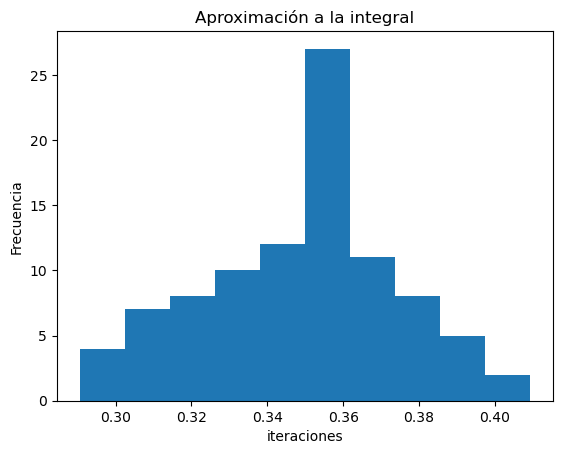

In [130]:
plt.hist(simulacion) #Grafica las frecuencias de la aproximación a la probabilidad de las N simualciones con 750 experiementos cada una.
plt.xlabel('iteraciones')
plt.ylabel('Frecuencia')
plt.title('Aproximación de probabilidad')
plt.show()

**PASO 9**. Calcule la media de la probabilidad de que haya interferencia entre el cojinete y la flecha, además de si desviación estándar.

In [131]:
media = np.mean(simulacion) #Calcula la media de esas N simulaciones
var = np.var(simulacion) #Calcula la varianza de esas N simulaciones
desv = np.std(simulacion) #Calcula la desvaicion de esas N simulaciones

**PASO 10**. Halle el intervalo de confianza de la probabilidad de que haya interferencia entre el cojinete y la flech con un nivel de confianza del $95 \%$.
\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [132]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = media + z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite superior por la formula
print("Entonces: ", l_inferior, "< \u03BC <", l_superior) #El intervalo en donde se encuentra el valor real a una confienza del 95%

Entonces:  0.34374721540182823 < μ < 0.3539641524887112
